<a href="https://colab.research.google.com/github/Bobby9800/STATSANDSCANS/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
california = fetch_california_housing()

# Convert to DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Display the first few rows
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Split the data into features and target variable
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using OLS
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:37:17   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

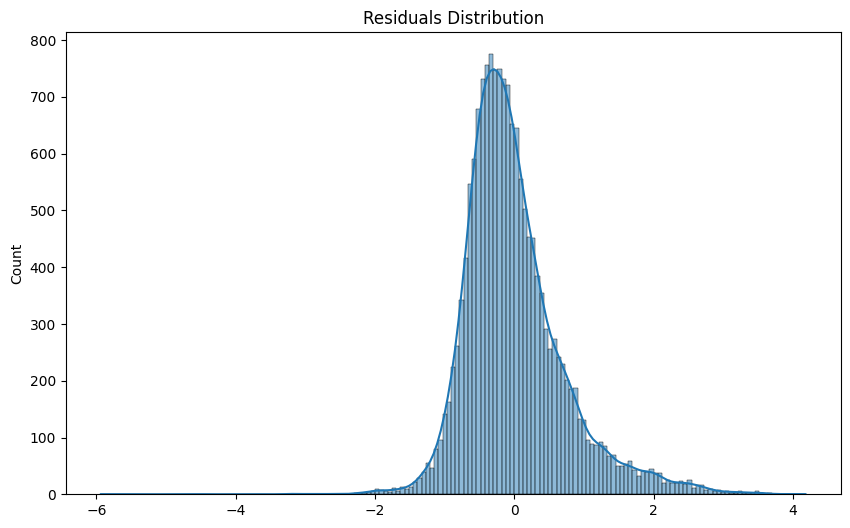

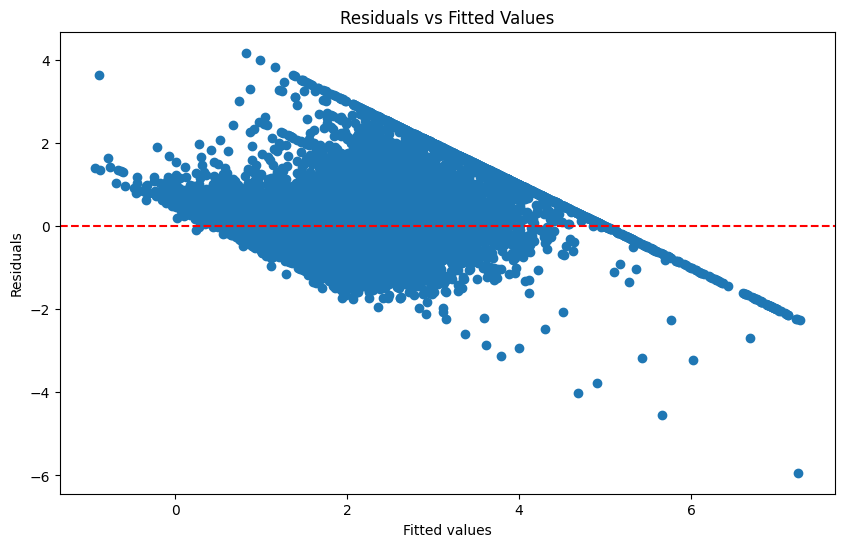

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the training set
y_train_pred = model.predict(X_train)

# Residuals
residuals = y_train - y_train_pred

# Plotting residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Residuals vs Fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16512.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test: ShapiroResult(statistic=0.9276098789205452, pvalue=5.405750330524167e-66)


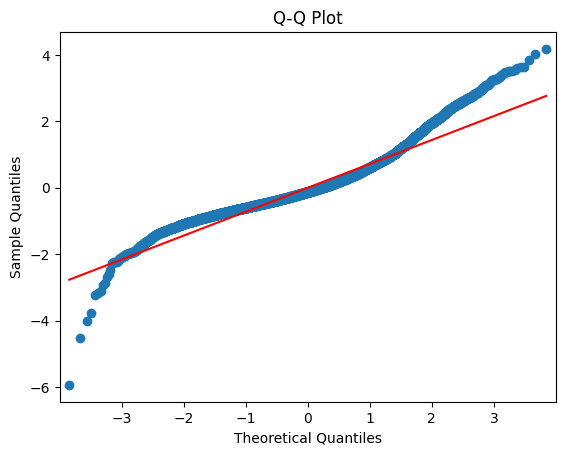

In [5]:
from scipy import stats

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test: {shapiro_test}")

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()


In [6]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_train)
print(f"Breusch-Pagan test: {bp_test}")


Breusch-Pagan test: (1170.513350500751, 2.2509787161322483e-247, 157.3917041470716, 1.0882774452552616e-256)


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)


     VIF Factor    features
0  17082.623698       const
1      2.501295      MedInc
2      1.241254    HouseAge
3      8.342786    AveRooms
4      6.994995   AveBedrms
5      1.138125  Population
6      1.008324    AveOccup
7      9.297624    Latitude
8      8.962263   Longitude


In [8]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation in residuals
dw_test = durbin_watson(residuals)
print(f"Durbin-Watson test: {dw_test}")


Durbin-Watson test: 1.9617928318577218
